In [3]:
import tensorflow as tf
import numpy as np
from tensorflow.keras import Model
import matplotlib.pyplot as plt

### create noisy dataset

In [14]:
def make_noisy_data(m=0.1,b=0.3,n=100):
  x=tf.random.uniform(shape=(n,))
  noise=tf.random.normal(shape=(len(x),),stddev=0.01)
  y=m*x+b+noise
  return x,y

In [15]:
x_train,y_train=make_noisy_data()

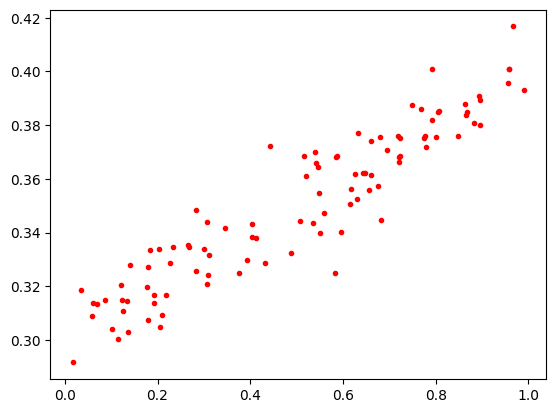

In [16]:
plt.plot(x_train,y_train,'r.')

In [3]:
tf.__version__

'2.15.0'

m and b variable


In [17]:
m=tf.Variable(0.)
b=tf.Variable(0.)

In [24]:
def predict(x):
  y=m*x+b
  return y

In [25]:
#loss function
def loss_func(y_true,y_pred):
  return tf.reduce_mean(tf.square(y_pred-y_true))

In [27]:
loss=loss_func(predict(x_train),y_train)
print(loss.numpy())

0.12356136


In [29]:
# gradient descent for training
learning_rate=0.05
steps=200


In [33]:
#traininig
for i in range(steps):
  with tf.GradientTape(watch_accessed_variables=False) as tape:
    tape.watch([m,b])
    predictions=predict(x_train)
    loss=loss_func(predictions,y_train)
  gradients=tape.gradient(loss,[m,b])
  m.assign_sub(gradients[0]*learning_rate)
  b.assign_sub(gradients[1]*learning_rate)
  if i%20==0 :
    print('step{0},loss{1}'.format(i,loss))

step0,loss0.00012369010073598474
step20,loss0.00012007484474452212
step40,loss0.0001172269694507122
step60,loss0.00011498342064442113
step80,loss0.0001132161050918512
step100,loss0.000111823741463013
step120,loss0.00011072691268054768
step140,loss0.00010986287088599056
step160,loss0.00010918223415501416
step180,loss0.00010864593787118793


In [34]:
print(m.numpy(),b.numpy())

0.10209485 0.29896247


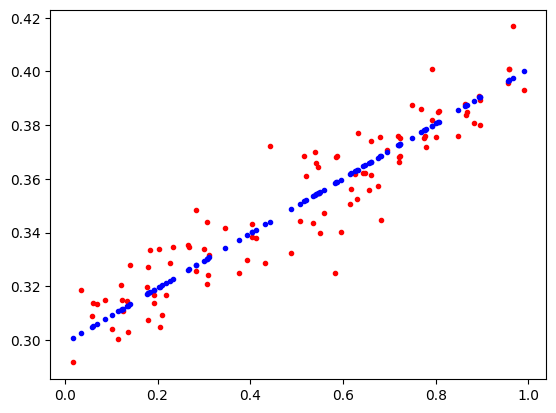

In [37]:
plt.plot(x_train,y_train,'r.')
plt.plot(x_train,predict(x_train),'b.')